In [1]:
import pandas as pd
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
color='red'

In [3]:
loan_details = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\Second Assignment - loan fraud\loan.csv",low_memory=False)

In [4]:
loan_details.shape

(39717, 111)

In [5]:
#utility methods
def plot_heatmap(dataframe,title):
    plt.figure(figsize=(20,8))
    sns.heatmap(dataframe.isna(),cbar=True, yticklabels=False, cmap="Blues_r" )
    plt.title(title)
    plt.show()

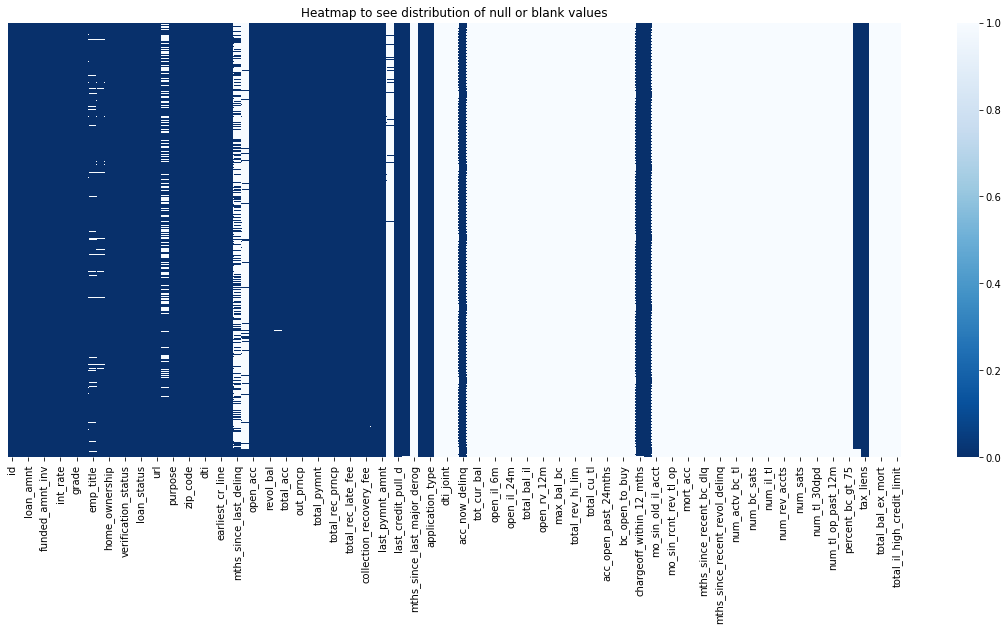

In [6]:
plot_heatmap(loan_details,"Heatmap to see distribution of null or blank values")

In [7]:
loan_details.drop(columns=loan_details.columns[loan_details.isnull().sum() > 22000].to_list(),inplace=True)

In [8]:
loan_details.isnull().sum()[loan_details.isnull().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

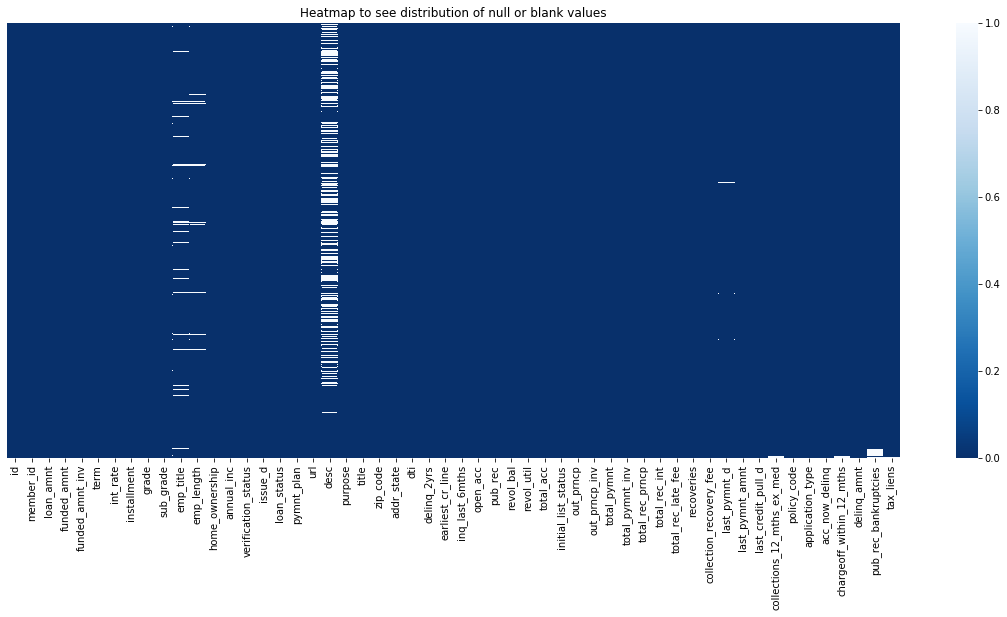

In [9]:
plot_heatmap(loan_details,"Heatmap to see distribution of null or blank values")

In [10]:
loan_details.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


## Let's delete those columns which has no value and those columns which are not necessary for our analysis

In [11]:
loan_details.drop(columns=['acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','url','application_type','initial_list_status','pymnt_plan','policy_code','desc','revol_util'],inplace=True)

In [12]:
loan_details.isnull().sum()[loan_details.isnull().sum()>0]

emp_title               2459
emp_length              1075
title                     11
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [13]:
#data_Dict = pd.read_excel(r"C:\Users\abc\Downloads\AI-ML\git\assignments\Second Assignment - loan fraud\Data_Dictionary.xlsx")
#temp = pd.merge(right=data_Dict,left=pd.DataFrame(loan_details.columns,columns=['LoanStatNew']),on='LoanStatNew',how='inner')
#temp.to_excel(r"C:\Users\abc\Downloads\AI-ML\git\assignments\Second Assignment - loan fraud\Data_dict_final.xlsx")

### Let's remove those columns which are not necessary

In [14]:
loan_details.drop(columns=['id','member_id','emp_title','issue_d','title','zip_code','inq_last_6mths','pub_rec','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies'],inplace=True)

In [15]:
loan_details.isnull().sum()[loan_details.isnull().sum()>0] 

emp_length    1075
dtype: int64

## Let's fill emp_length null values as others as we don't know whether they are buisness men, self-employed or whatever category they belonged to

In [16]:
loan_details.emp_length.fillna('Others',inplace=True)

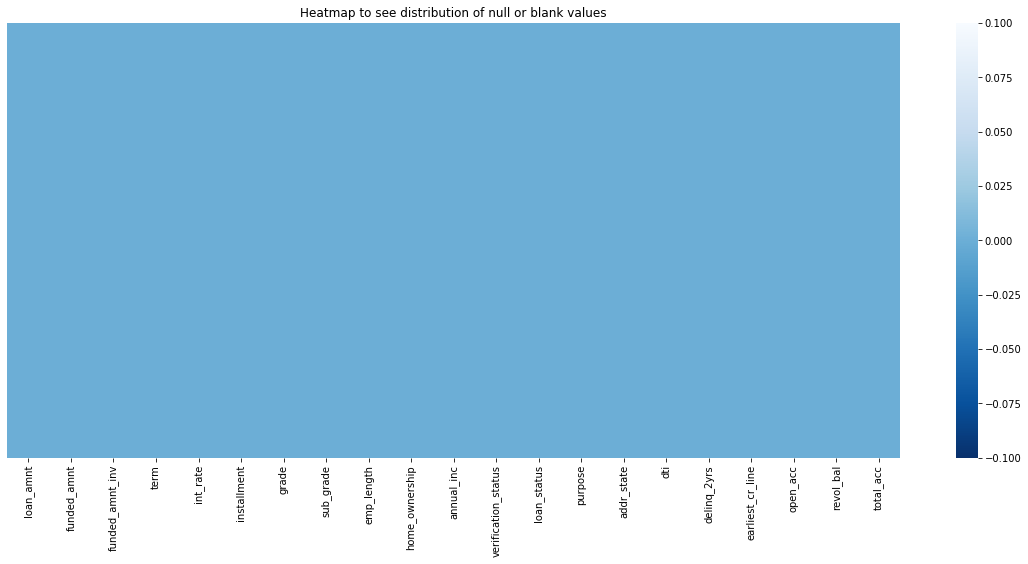

In [17]:
plot_heatmap(loan_details,"Heatmap to see distribution of null or blank values") #we can see there is no null values present

### Let's analyse column types

In [18]:
loan_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           39717 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

### Assigning proper datatypes to each column

In [19]:
loan_details.term = loan_details.term.apply(lambda x : int(str.strip(x.replace("months",""))))
loan_details.int_rate =  loan_details.int_rate.apply(lambda x : float(str.strip(x.replace("%",""))))
#loan_details.revol_util =  loan_details.revol_util.apply(lambda x : x if isinstance(x, float) else float(str.strip(x.replace("%",""))) )


In [20]:
#loan_details.to_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\Second Assignment - loan fraud\loan-cleaned.csv")

### In Verification status column we can see verified and source verified is referring to same thing so let's agree to convert both to verified

In [21]:
loan_details['verification_status'] = loan_details.verification_status.apply(lambda x : x.replace("Source Verified","Verified"))

# Univariate analysis

### Let's do univariate analysis to understand the data in hand

## Before that we have to derive some variables for our analysis

Let's categorised interest rates

In [22]:
print("Maximum rate - ", loan_details.int_rate.max())
print("Minimun rate - ",loan_details.int_rate.min())

Maximum rate -  24.59
Minimun rate -  5.42


In [23]:
names=['5-10','10-15','15-20','20-25']
bins=[5,10,15,20,25]
loan_details.insert(5,'int_range',pd.cut(loan_details.int_rate,bins,labels=names))

We will perform univariate analysis of <b>funded_amnt, term,int_rate,grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status,loan_status,purpose,addr_state  attributes</b>    

In [24]:
#utility methods
def univariate(dataframe,column,title,bins=15,var_type='cont'):
    if var_type=='cont' :
        plt.figure(figsize=(20,8))
        plt.xlabel(title)
        sns.distplot(pd.Series(dataframe[column],name=title),bins=bins);
        plt.show()
        
    if var_type=='cat' :
        plt.figure(figsize=(20,8))
        plt.xlabel(title)
        dataframe[column].value_counts().plot.bar()
        plt.show()
    


### Continuous variables

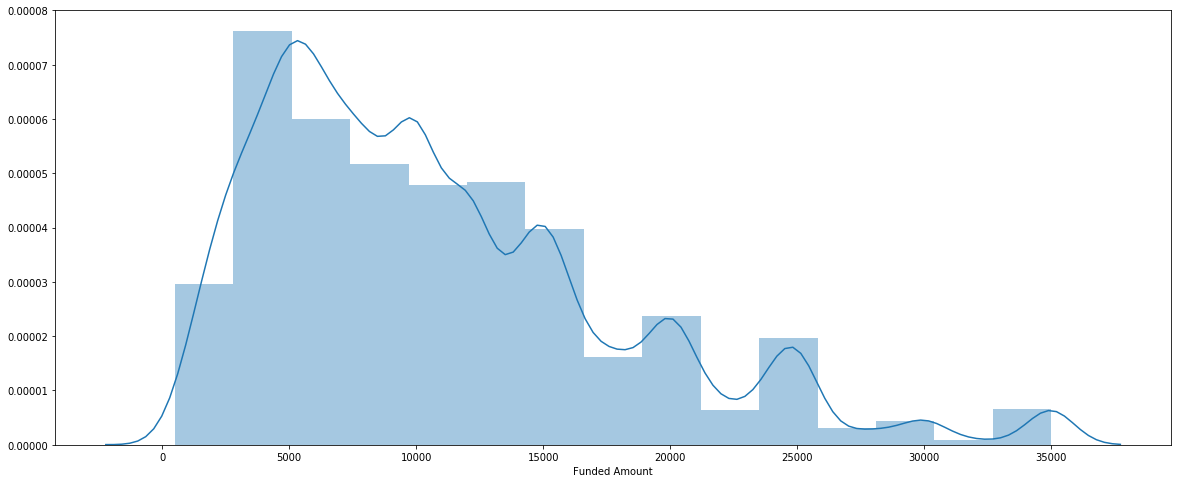

In [25]:
univariate(loan_details,'funded_amnt','Funded Amount',15)

<b><font color=color>[Insights]</font></b>: Funded amount data is right skewed

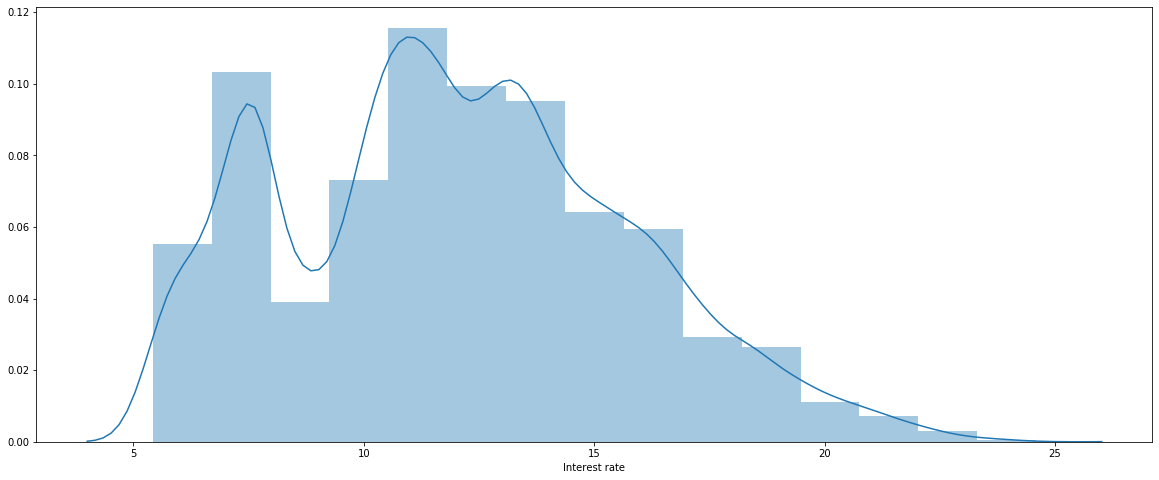

In [26]:
univariate(loan_details,'int_rate','Interest rate',15)

<b><font color=color>[Insights]</font></b>: Interest rate data is right skewed

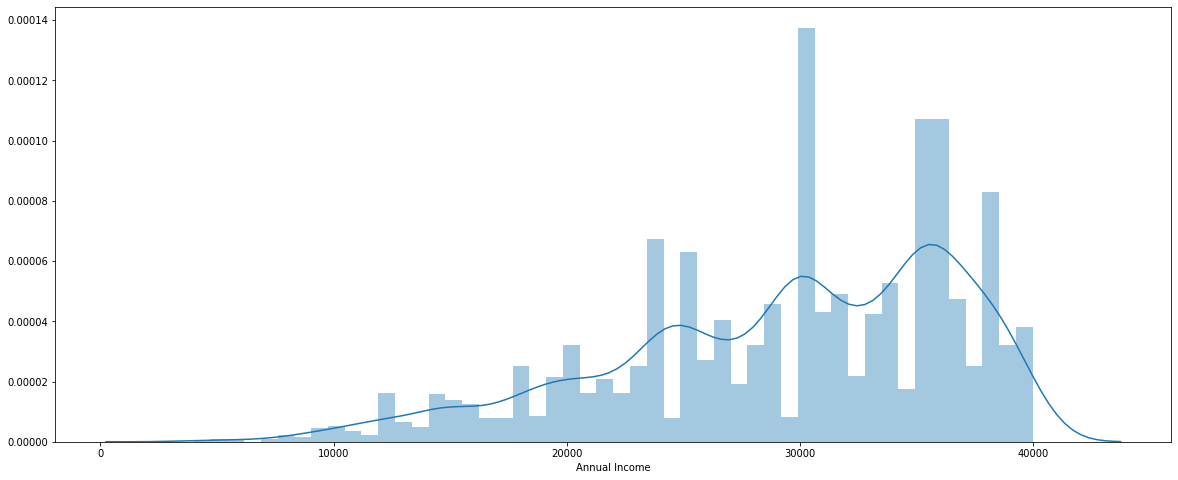

In [27]:
univariate(loan_details[loan_details.annual_inc < 40000],'annual_inc','Annual Income',50)

<b><font color=color>[Insights]</font></b>: Annual income data is left skewed

### Categorical variables

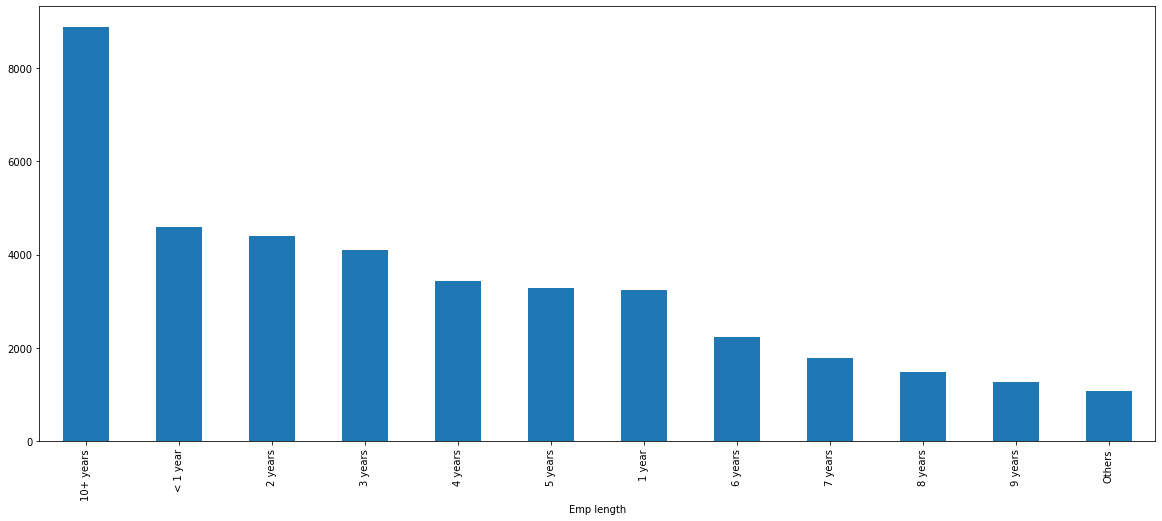

In [28]:
univariate(loan_details,'emp_length','Emp length',15,'cat')

<b><font color=color>[Insights]</font></b>: Most of the loan taken by people having exp more than 10+ years

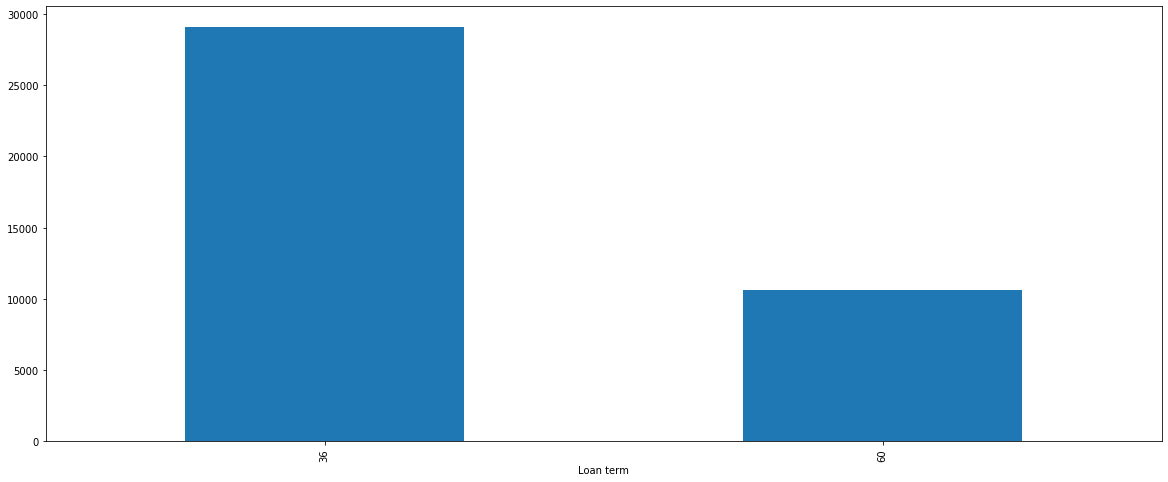

In [29]:
univariate(loan_details,'term','Loan term',15,'cat')

<b><font color=color>[Insights]</font></b>: Most of the people took loan for 36 months term

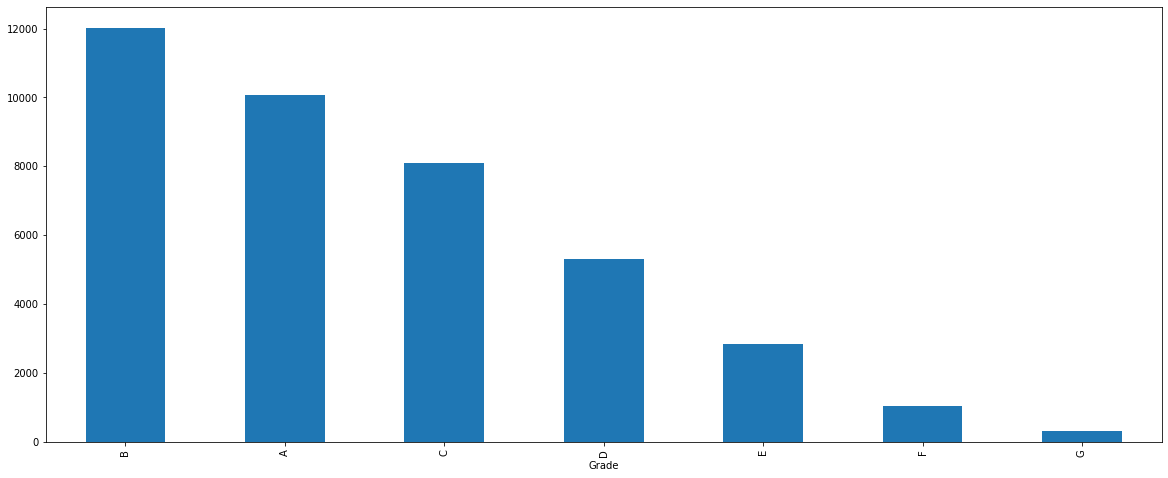

In [30]:
univariate(loan_details,'grade','Grade',15,'cat')

<b><font color=color>[Insights]</font></b>: B grade has highest loan disbursals.

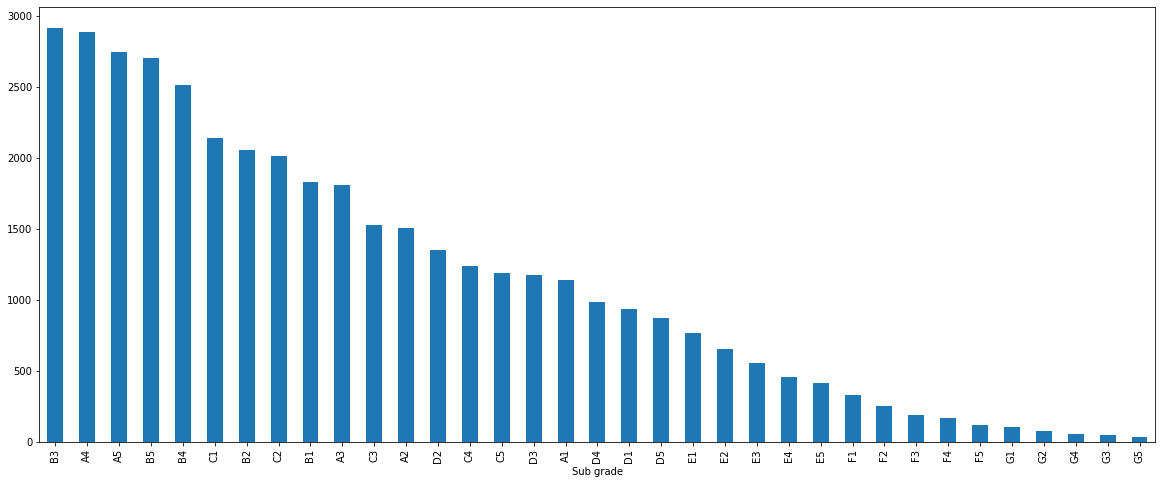

In [31]:
univariate(loan_details,'sub_grade','Sub grade',15,'cat')

<b><font color=color>[Insights]</font></b>: B3,A4 has dominance

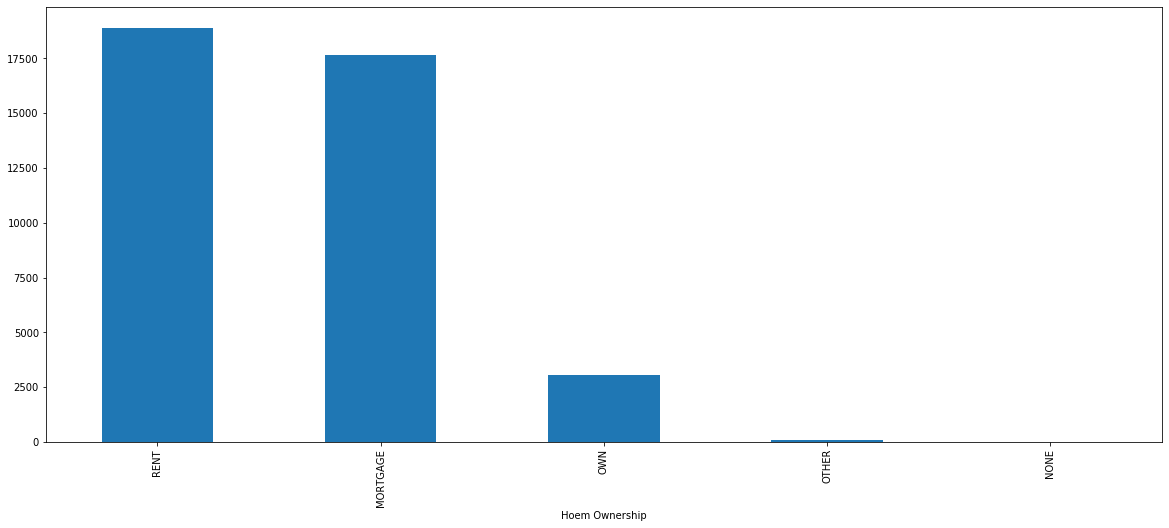

In [32]:
univariate(loan_details,'home_ownership','Hoem Ownership',15,'cat')

<b><font color=color>[Insights]</font></b>: People who are living in rented house and has mortgages are taking higher amount of loan

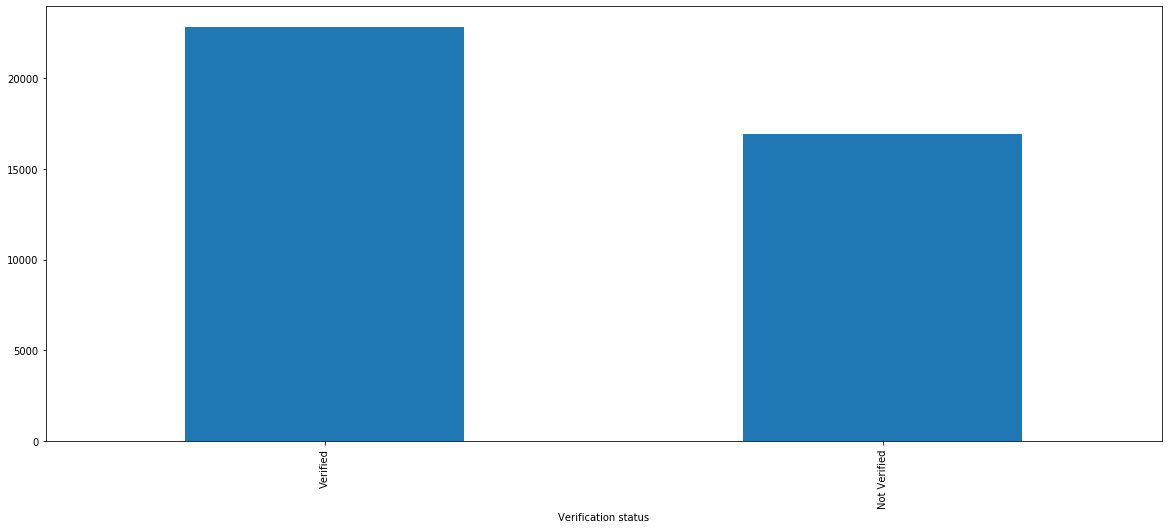

In [33]:
univariate(loan_details,'verification_status','Verification status',15,'cat')

<b><font color=color>[Insights]</font></b>: Verified sources are taking more loan

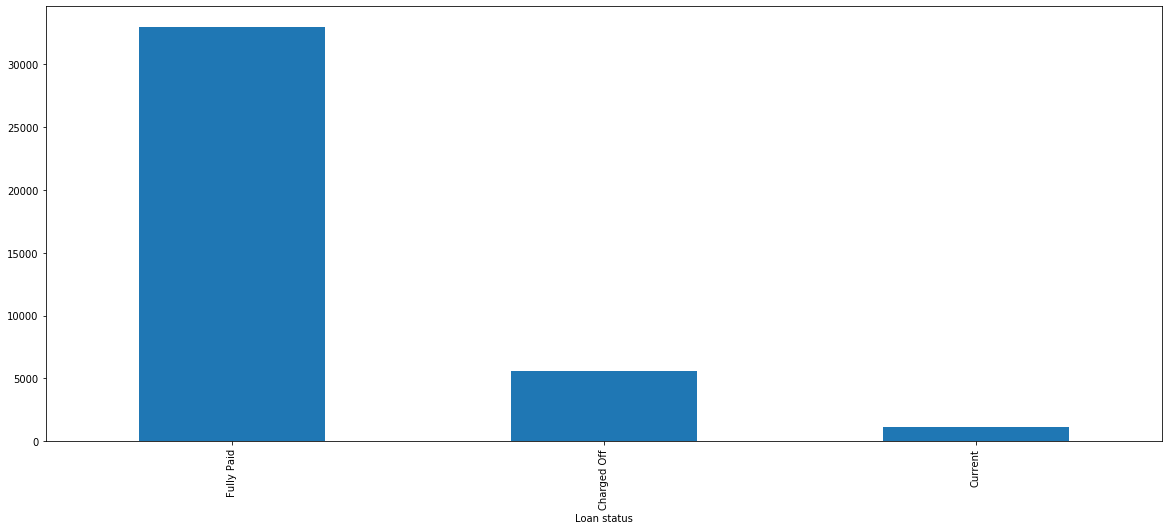

In [34]:
univariate(loan_details,'loan_status','Loan status',15,'cat')

<b><font color=color>[Insights]</font></b>: Most of the people paid their loans

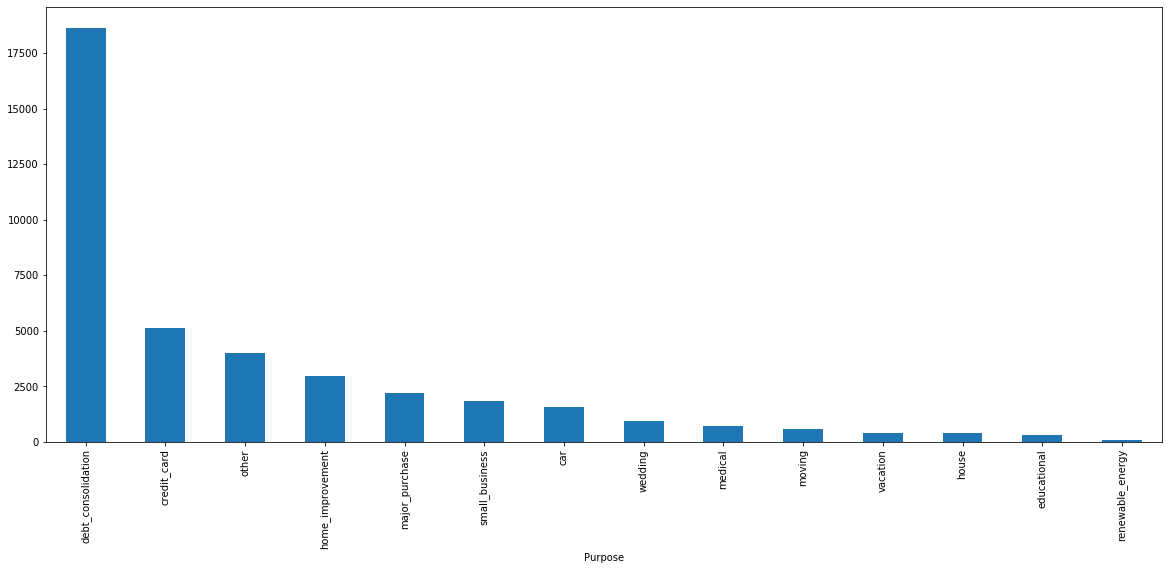

In [35]:
univariate(loan_details,'purpose','Purpose',15,'cat')

<b><font color=color>[Insights]</font></b>: Most of the people took loan for debi cosolidation(to finance the debt)

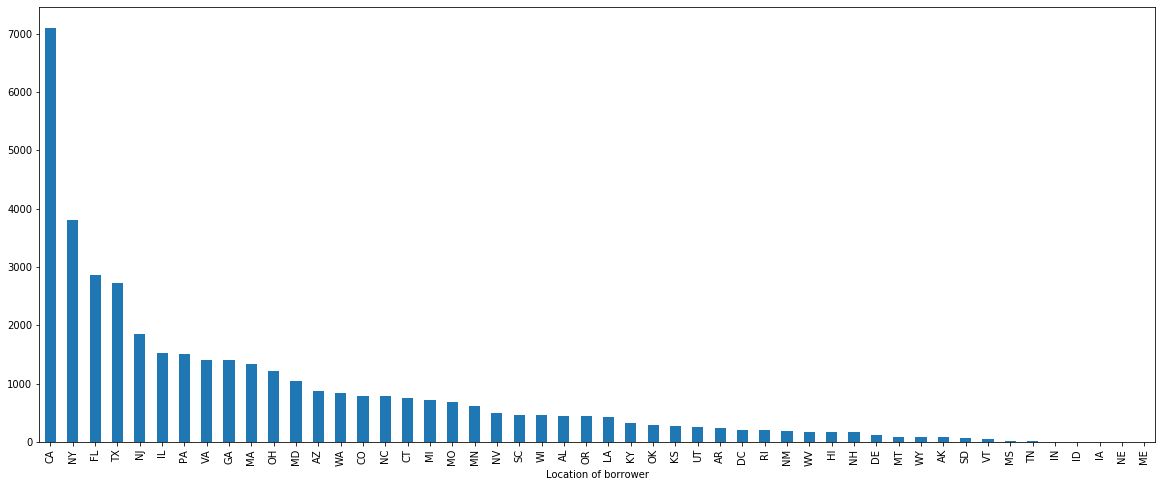

In [36]:
univariate(loan_details,'addr_state','Location of borrower',15,'cat')

<b><font color=color>[Insights]</font></b>: CA has highest number of loan distbursals

In [40]:
def univariate(df,col,vartype,hue=None):
    
    #sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots(figsize=(20,8))
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(18 , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_details[col]))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

#### 1) loan term vs loan_status

In [41]:
data1 = calculate_defaulter_precentage(loan_details,'term')
data1['Loan Default Probability'].iloc[0]
total = data1.shape[0]*(data1.shape[1]-2)
data1

NameError: name 'calculate_defaulter_precentage' is not defined

In [42]:
#ax = sns.countplot(data = data1, x= 'term', order=data1['term'].value_counts().index,hue = 'loan_status') 
ax = data1.iloc[:,0:3].plot(kind='bar',rot=1,stacked=False)
t = 0
for p in ax.patches:
        print(float((p.get_height())),"/",float(data1['All'].iloc[int(t/3)]))
        ax.annotate('{:1.1f}%'.format(float((p.get_height()*100)/float(data1['All'].iloc[int(t/3)]))), (p.get_x()+0.05, p.get_height()+20))  
        t += 1

NameError: name 'data1' is not defined

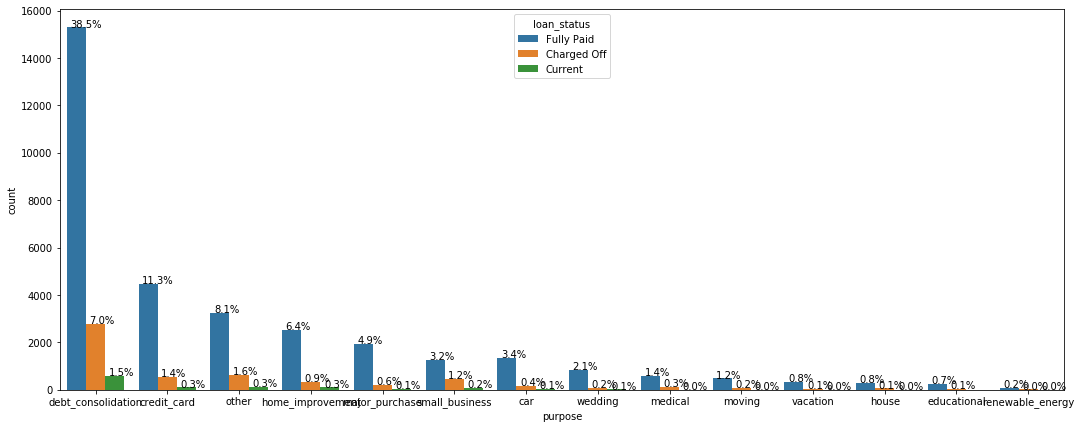

In [43]:
univariate(df=loan_details,col='purpose',vartype=1,hue='loan_status')

In [ ]:
univariate(df=loan_details,col='int_range',vartype=1,hue='loan_status')

In [ ]:
univariate(df=loan_details,col='emp_length',vartype=1,hue='loan_status')

In [ ]:
univariate(df=loan_details,col='home_ownership',vartype=1,hue='loan_status')

In [ ]:
univariate(df=loan_details[loan_details.annual_inc < 70000],col='annual_inc',vartype=0)

In [ ]:
loan_details.info()

In [ ]:
univariate(df=loan_details,col='verification_status',vartype=1,hue='loan_status')

In [ ]:
univariate(df=loan_details,col='addr_state',vartype=1,hue='loan_status')

In [ ]:
loan_details.info()

In [ ]:
temp = pd.pivot_table(index=['purpose'],columns=['loan_status'],data=loan_details, aggfunc='count',values='funded_amnt')

In [ ]:
temp

In [ ]:
temp['total'] = temp.sum(axis=1)

In [ ]:
temp['Loan Default Probability'] = temp.total/temp['Charged Off']

In [44]:
def calculate_defaulter_precentage(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['loan_status'],margins=True)
    def_tab['All'] = def_tab['Charged Off'] + def_tab['Current'] + def_tab['Fully Paid']
    def_tab['Loan Default Probability'] = round((def_tab['Charged Off']/def_tab['All']),3)
    def_tab = def_tab[0:-1] # removing last row with sum totol 
    return def_tab

In [45]:
def plot_bar_line_chart(dataframe,column,stacked=False):
    
    plot = calculate_defaulter_precentage(dataframe,column)
    
    display(plot)
    
    #initializing line plot
    linePlot = plot[['Loan Default Probability']] 
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line.set_title(dataframe[column].name.title()+' vs Loan Default Probability',fontsize=20,weight="bold")
    line.set_xlabel(dataframe[column].name.title(),fontsize=14)
    line.set_ylabel('Loan Default Probability',color = 'r',fontsize=20)
    
    #initializing bar plot
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
    
    plt.show()

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
emp_length,,,,,
1 year,456,71,2713,3240,0.141
10+ years,1331,391,7157,8879,0.150
2 years,567,97,3724,4388,0.129
3 years,555,83,3457,4095,0.136
4 years,462,94,2880,3436,0.134
5 years,458,88,2736,3282,0.140
6 years,307,61,1861,2229,0.138
7 years,263,62,1448,1773,0.148
8 years,203,44,1232,1479,0.137


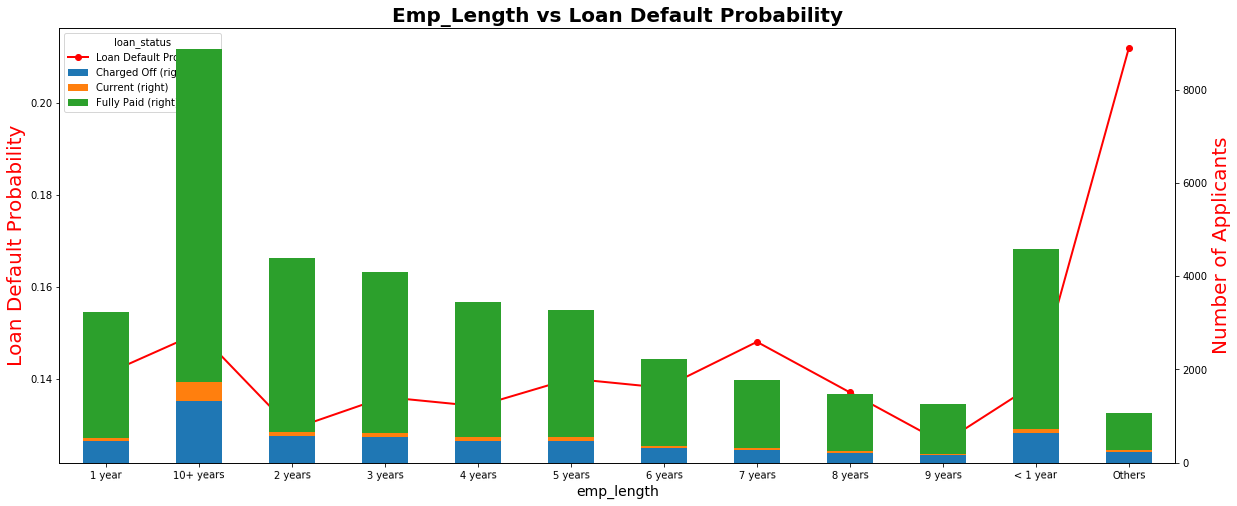

In [46]:
plot_bar_line_chart(loan_details,'emp_length',True)

In [ ]:
plot_bar_line_chart(loan_details,'term',False)